<a href="https://colab.research.google.com/github/aadedolapo/sentence-generator-for-indigenous-nigerian-language/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import neccessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import nltk
import numpy as np
import pandas as pd
import re
import pickle

In [ ]:
# Testing if GPU is active
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Import Data from url
!wget https://raw.githubusercontent.com/Niger-Volta-LTI/yoruba-text/master/Owe/owe.txt

--2022-10-06 10:47:09--  https://raw.githubusercontent.com/Niger-Volta-LTI/yoruba-text/master/Owe/owe.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180836 (177K) [text/plain]
Saving to: ‘owe.txt’

owe.txt             100%[===================>] 176.60K  --.-KB/s    in 0.02s   

2022-10-06 10:47:09 (9.76 MB/s) - ‘owe.txt’ saved [180836/180836]



In [ ]:
# Load data
with open("owe.txt", "r") as file:
  data = file.readlines()
  # using regular expression to remove punctuations from each line
  data = re.sub(r"[^\w\s]","",''.join(data)).lower().split('\n')
  #data = ' '.join(data).lower().split('\n')

del data[0] # whitespace
del data[-1] # whitespace
print(len(data))
# deleting lines containing english words
print(data[50])
del data[50]
print(data[823])
del data[823]
print(data[2075:2077])
del data[2075:2077]
print(data[2076:2079])
del data[2076:2079]
print()
print(len(data))

2700
what is the clothselling woman have to sell that she carries a whip in her hand
the following is a variant
['compare mo mọọ gùn   ', 'compare mo gbọn tán    ']
['compare the preceding entry', 'compare mo gbọn tán    ', 'compare mo gbọn tan    ']

2693


In [ ]:
df = pd.DataFrame(data, columns=['owe'])
df.head()

,owe
0,a di gàárì sílẹ ewúrẹ ńyọjú ẹrù ìran rẹ ni
1,a kì í dàgbà má làáyà ibi ayé bá báni là ńjẹ ẹ
2,àgbà kán ṣe bẹẹ lógùn yemaja ló gbé e lọ
3,ibi tí oyín gbé ńhó tí àdó ńhó ìfun ò dákẹ lásán
4,ìdí òwò ni òwòó gbé tà


## Data Preprocessing(Removing Stopwords, Tokenization, Sequencing and Sequence Padding)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# Function for text cleaning
def stopwords_(text):
    # Remove english stop words
    stop_words = set(stopwords.words('english')) - set(['a','i','o','re','to','an','so','ma'])
    stop_words.update(['compare'])
    cleaned_text = ' '.join([w for w in text.split() if w in stop_words])
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['stopwords'] = df['owe'].apply(stopwords_)

In [ ]:
df.sample(5)

,owe,stopwords
566,ẹni méjì kì í bínú egbinrin,
1112,bí ẹnìkan ò kíni kúùjokòó kíkí ọlọrunún ju ti ...,
825,ojú ní ńkán ọkọlóbìnrin àlè méjì á jà dandan,
877,oúnjẹ tí a ó jẹ pẹ a kì í bu òkèlèe ẹ tóbi,
2511,bí a kò bá gbọn ju àparò oko ẹni lọ a kì í pa á,


In [ ]:
df['stopwords'].unique()

array(['', 'compare', 'too', 'he', 'in'], dtype=object)

In [ ]:
df[df['stopwords']=='compare']

,owe,stopwords
256,compare bí a bá dàgbà à yé ogunún jà,compare
1544,compare wọn ní àwòko o bú ọba,compare


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# Function for text cleaning
def clean_text(text):
    # Remove english stop words
    stop_words = set(stopwords.words('english')) - set(['a','i','o','re','to','an','so','ma'])
    stop_words.update(['compare'])
    cleaned_text = ' '.join([w for w in text.split() if not w in stop_words])
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['clean_owe'] = df['owe'].apply(clean_text)

In [ ]:
df.sample(5)

,owe,stopwords,clean_owe
1403,ojú rẹgbin kò fọ ajọpọìyàmárù,,ojú rẹgbin kò fọ ajọpọìyàmárù
241,ọmọràn ní ḿmọ oyún ìgbín,,ọmọràn ní ḿmọ oyún ìgbín
1537,tọsán tòru imú ò gbélẹ bó ba dákẹ a jẹ pé ó pin,,tọsán tòru imú ò gbélẹ bó ba dákẹ a jẹ pé ó pin
2442,arìnfààlójúakẹgàn ayankàṣàlojúabúni abúni ò ló...,,arìnfààlójúakẹgàn ayankàṣàlojúabúni abúni ò ló...
877,oúnjẹ tí a ó jẹ pẹ a kì í bu òkèlèe ẹ tóbi,,oúnjẹ tí a ó jẹ pẹ a kì í bu òkèlèe ẹ tóbi


In [ ]:
df['clean_owe']

0              a di gàárì sílẹ ewúrẹ ńyọjú ẹrù ìran rẹ ni
1          a kì í dàgbà má làáyà ibi ayé bá báni là ńjẹ ẹ
2                àgbà kán ṣe bẹẹ lógùn yemaja ló gbé e lọ
3        ibi tí oyín gbé ńhó tí àdó ńhó ìfun ò dákẹ lásán
4                                  ìdí òwò ni òwòó gbé tà
                              ...                        
2688    ibi tí à ńgbé là ńṣe bí a bá dé ìlú adẹtẹ à di...
2689                        ibi tí o máa sùn lo tẹ ọmọ sí
2690    ibi tí òjòó ti ńpa igún bọọ jìnnà ta ní rán ig...
2691                       ibi tí òjòó bá ọjọ ní ńpa á sí
2692       ibi tí oníyọnmọntìí ṣubú sí ibẹ ló ti tà á tán
Name: clean_owe, Length: 2693, dtype: object

In [ ]:
# convert column to a list of each row
data = [line for line in df['clean_owe']]

In [ ]:
# Instantiating tokenizer
tokenizer = Tokenizer()

# Assigning a new variable name to data
corpus = data

# Create tokens of each words as a dictionary with key being word and the value beings its token
tokenizer.fit_on_texts(corpus)

#calculating total number of words in the data
total_words = len(tokenizer.word_index) + 1

print(total_words)
print(tokenizer.word_index)


5096
{'a': 1, 'ní': 2, 'ò': 3, 'í': 4, 'kì': 5, 'ó': 6, 'bí': 7, 'bá': 8, 'tí': 9, 'tó': 10, 'ẹni': 11, 'fi': 12, 'kò': 13, 'ni': 14, 'jẹ': 15, 'ṣe': 16, 'ká': 17, 'ẹ': 18, 'mọ': 19, 'kí': 20, 'là': 21, 'o': 22, 'ti': 23, 'kó': 24, 'rẹ': 25, 'yó': 26, 'òun': 27, 'lọ': 28, 'sí': 29, 'rí': 30, 'ló': 31, 'á': 32, 'ọmọ': 33, 'ojú': 34, 'pa': 35, 'wọn': 36, 'lè': 37, 'ohun': 38, 'gbé': 39, 'à': 40, 'má': 41, 'fún': 42, 'pé': 43, 'la': 44, 'ọ': 45, 'máa': 46, 'ta': 47, 'wá': 48, 'tán': 49, 'kan': 50, 'sọ': 51, 'kú': 52, 'mú': 53, 'ilé': 54, 'ara': 55, 'ẹní': 56, 'àgbà': 57, 'ńjẹ': 58, 'ọjọ': 59, 'ajá': 60, 'di': 61, 'ibi': 62, 'kọ': 63, 'baba': 64, 'bọ': 65, 'ọlẹ': 66, 'èèyàn': 67, 'fẹ': 68, 'orí': 69, 'adìẹ': 70, 'gbọ': 71, 'mi': 72, 'ńṣe': 73, 'lójú': 74, 'ọwọ': 75, 'ńpa': 76, 'ọràn': 77, 'lọwọ': 78, 'ọmọdé': 79, 'òún': 80, 'ṣéé': 81, 'sílẹ': 82, 'wo': 83, 'gba': 84, 'gbogbo': 85, 'dá': 86, 'ju': 87, 'ọrọ': 88, 'bó': 89, 'mí': 90, 'gbà': 91, 'oko': 92, 'inú': 93, 'ẹnu': 94, 'mo': 95, 'dé':

In [ ]:
# Training features
input_sequences = []

for line in corpus:
  # Converts each sentence as its tokenized equivalent
  token_list = tokenizer.texts_to_sequences([line])[0]
  
  for i in range(1,len(token_list)):
    #generating n_gram sequences: 1st two words in the token_list is one sequence, next two words are another sequence and so on
      n_gram_sequence = token_list[:i+1]
      #appending each n_gram sequence to the list of our features
      input_sequences.append(n_gram_sequence)
print("The training features are:\n",input_sequences)

The training features are:
 [[1, 61], [1, 61, 1281], [1, 61, 1281, 82], [1, 61, 1281, 82, 192], [1, 61, 1281, 82, 192, 915], [1, 61, 1281, 82, 192, 915, 121], [1, 61, 1281, 82, 192, 915, 121, 727], [1, 61, 1281, 82, 192, 915, 121, 727, 25], [1, 61, 1281, 82, 192, 915, 121, 727, 25, 14], [1, 5], [1, 5, 4], [1, 5, 4, 323], [1, 5, 4, 323, 41], [1, 5, 4, 323, 41, 2047], [1, 5, 4, 323, 41, 2047, 62], [1, 5, 4, 323, 41, 2047, 62, 139], [1, 5, 4, 323, 41, 2047, 62, 139, 8], [1, 5, 4, 323, 41, 2047, 62, 139, 8, 324], [1, 5, 4, 323, 41, 2047, 62, 139, 8, 324, 21], [1, 5, 4, 323, 41, 2047, 62, 139, 8, 324, 21, 58], [1, 5, 4, 323, 41, 2047, 62, 139, 8, 324, 21, 58, 18], [57, 496], [57, 496, 16], [57, 496, 16, 168], [57, 496, 16, 168, 2048], [57, 496, 16, 168, 2048, 2049], [57, 496, 16, 168, 2048, 2049, 31], [57, 496, 16, 168, 2048, 2049, 31, 39], [57, 496, 16, 168, 2048, 2049, 31, 39, 169], [57, 496, 16, 168, 2048, 2049, 31, 39, 169, 28], [62, 9], [62, 9, 2050], [62, 9, 2050, 39], [62, 9, 2050, 3

## 'Pre' padding the sequences with '0' to bring them to equal array length

In [ ]:
# Calculating the length of the longest sequence in our training features
max_sequence_len = max([len(x) for x in input_sequences])

#pre-pading each value of the input_sequence
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre'))
print(input_sequences)

[[   0    0    0 ...    0    1   61]
 [   0    0    0 ...    1   61 1281]
 [   0    0    0 ...   61 1281   82]
 ...
 [   0    0    0 ...   31   23  212]
 [   0    0    0 ...   23  212   32]
 [   0    0    0 ...  212   32   49]]


In [ ]:
# Create predictors and label using numpy slicing
features = input_sequences[:,:-1]
labels = input_sequences[:,-1]

# Creating one hot encoding values of each labels 
labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Modelling

**PS: One rule of thumb is that the embedding dimension should be approximately 1.6 times the square root of the number of unique elements in the category**

In [ ]:
# Set embedding dimension for embedding layer
output_dim = int(np.sqrt(total_words) * 1.6)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, output_dim=output_dim, input_length=max_sequence_len - 1))
model.add(LSTM(400, dropout=0.2, return_sequences=True))
model.add(LSTM(400))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 57, 114)           580944    
                                                                 
 lstm (LSTM)                 (None, 57, 400)           824000    
                                                                 
 lstm_1 (LSTM)               (None, 400)               1281600   
                                                                 
 dense (Dense)               (None, 5096)              2043496   
                                                                 
Total params: 4,730,040
Trainable params: 4,730,040
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(features,labels,epochs=500,verbose=1)

Epoch 1/500
763/763 [==============================] - 24s 16ms/step - loss: 6.8248 - accuracy: 0.0462
Epoch 2/500
763/763 [==============================] - 13s 16ms/step - loss: 6.4369 - accuracy: 0.0607
Epoch 3/500
763/763 [==============================] - 13s 17ms/step - loss: 6.2633 - accuracy: 0.0732
Epoch 4/500
763/763 [==============================] - 14s 18ms/step - loss: 6.0370 - accuracy: 0.0950
Epoch 5/500
763/763 [==============================] - 13s 17ms/step - loss: 5.7846 - accuracy: 0.1138
Epoch 6/500
763/763 [==============================] - 13s 17ms/step - loss: 5.5416 - accuracy: 0.1252
Epoch 7/500
763/763 [==============================] - 13s 17ms/step - loss: 5.3001 - accuracy: 0.1364
Epoch 8/500
763/763 [==============================] - 13s 17ms/step - loss: 5.0484 - accuracy: 0.1474
Epoch 9/500
763/763 [==============================] - 13s 17ms/step - loss: 4.7957 - accuracy: 0.1594
Epoch 10/500
763/763 [==============================] - 13s 17ms/step - l

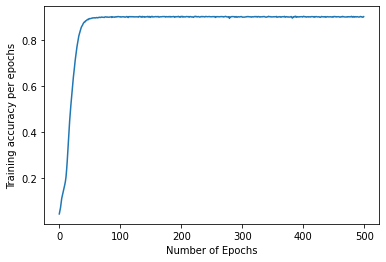

In [ ]:
#plotting the training accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

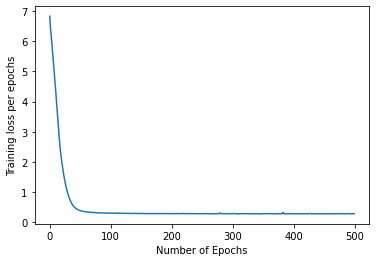

In [ ]:
#plotting the training loss of the model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training loss per epochs')
plt.show()

## Text Prediction. A seed text to start the predicted proverbs is preprocessed exactly as the training data is 

In [ ]:
def generate_proverbs(seed_text,next_words):
    """ A function that takes a 
    seed_text: to prompt next word prediction
    next_word: The number of next words to predict
    and returns the predicted yoruba proverbs"""
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        classes=np.argmax(predicted,axis=1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == classes:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

## Generate yoruba proverbs

In [ ]:
generate_proverbs('afẹfẹ',15)

'afẹfẹ ńda ológìì láàmú oníyẹfun rọra a tì rẹ ra àtùpà ó ní òun àjítannáwòlóru ọkọ'

In [ ]:
generate_proverbs('àtẹnumọ',15)

'àtẹnumọ kì í lérí àti pa ejò a kì í fi igún bọrí jókòó sídìí iná'

In [ ]:
alist = ['ńwúṣu','àgbà','ewúrẹ']
for word in alist:
  print(generate_proverbs(word,15))

ńwúṣu lérè ní ńní kò jẹ fúnra ẹ kù ó ní bí òún bá ju ẹyìn
àgbà tí kò nítìjú ojú kan ni ìbá ní ojú kan náà a wà lọgangan iwájúu
ewúrẹ kì í wọlé tọ ìkokò kì í fi ehín pín fún àgbọn dájọ la fi


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# save model 
model.save("/content/gdrive/My Drive/model500ep.h5")

In [ ]:
# Reset model 
from keras import backend as K
del model
K.clear_session()
tf.compat.v1.reset_default_graph()

NameError: ignored

In [ ]:
# translator library
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 10.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
to_translate = generate_proverbs('obìnrin',10)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(to_translate)
translated

obìnrin tó bímọ tó bí olómitútù wàhálà ọkọ ẹẹ dínkù kò


"A woman who gives birth to an air conditioner does not reduce her husband's problems"

In [ ]:
to_translate = generate_proverbs('ọkùnrin',10)
translated = GoogleTranslator(source='auto', poppoppokkk
                                   
                                                
                                                 
                                                                        target='en').translate(to_translate)
print(to_translate)
translated


ọkùnrin kì í ké akọ igi kì í ṣoje kí á


'A man does not cut a tree and does not eat it'

In [ ]:
to_translate = generate_proverbs('abìwàkunkun',10)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(to_translate)
translated

abìwàkunkun ọlọkọ la fi ńgbọn èkìtì ṣàngó fi ńra ẹ lọ


'We are going to take you away with the help of the thief'

In [ ]:
to_translate = generate_proverbs('afẹfẹ',10)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(to_translate)
translated

afẹfẹ ńda ológìì láàmú oníyẹfun rọra a tì rẹ ra àtùpà


'the wind is making a noise, bothering the baker, he gently pushed him to buy a lamp'

In [ ]:
to_translate = generate_proverbs('àtẹnumọ',10)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(to_translate)
translated

àtẹnumọ kì í lérí àti pa ejò a kì í fi


'emphasis is not given and snakes are not killed'

In [ ]:
to_translate = generate_proverbs('àgbà',10)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(to_translate)
translated

àgbà tí kò nítìjú ojú kan ni ìbá ní ojú kan


'an old man who is not ashamed of one eye would have one eye'

In [ ]:
to_translate = generate_proverbs('ewúrẹ',5)
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
print(to_translate)
translated

ewúrẹ kì í wọlé tọ ìkokò


'the goat does not enter the pot'